<H1 style="text-align: center">EEEM066 - Fundamentals of Machine Learning</H1>
<H1 style="text-align: center">Week 1 (Part 3): Introduction to Pytorch</H1>

> Dr. Xiatian (Eddy) Zhu, Dr Syed Sameed Husain

> xiatian.zhu@surrey.ac.uk, sameed.husain@surrey.ac.uk


**Introduction**

This lab is designed to deepen your understanding of PyTorch, providing hands-on experience with its core functionalities and applications in machine learning.

Happy Programming!⚡⚡

# Sources:
* This notebook used (and modified) code from the following repos:
    * https://github.com/jonkrohn/ML-foundations
    * https://github.com/mrdbourke/pytorch-deep-learning
    


# Contents


*   [Introduction to Tensors](https://colab.research.google.com/drive/1GibKnmLJFj500y_XqtfJ0DrgPNgL-LM3#scrollTo=a9a36eb6-1b34-4968-a5fa-bbed7f377444)
*   [Finding the min, max, mean, sum, etc (tensor aggregation)](https://colab.research.google.com/drive/1GibKnmLJFj500y_XqtfJ0DrgPNgL-LM3#scrollTo=e78d3815-4771-4988-b8bb-d75db3b05ca4)
*   [Finding the positional min and max, the famous argmin() and argmax()!](https://colab.research.google.com/drive/1GibKnmLJFj500y_XqtfJ0DrgPNgL-LM3#scrollTo=faada50a-e179-4983-b4df-374aff876e4b)
*   [Reshaping, stacking, squeezing and unsqueezing tensors](https://colab.research.google.com/drive/1GibKnmLJFj500y_XqtfJ0DrgPNgL-LM3#scrollTo=c2c61fb5-65b4-4469-bd7c-8dddad93ad6e)
*   [Indexing (selecting data from tensors)](https://colab.research.google.com/drive/1GibKnmLJFj500y_XqtfJ0DrgPNgL-LM3#scrollTo=d44dc72a-9fcc-4e63-ac00-09dddf28f5a8)
*   [PyTorch tensors & NumPy](https://colab.research.google.com/drive/1GibKnmLJFj500y_XqtfJ0DrgPNgL-LM3#scrollTo=cba53835-91bc-41c8-a79c-4ec3c4446c31)
*   [Reproducibility (trying to take random out of random)](https://colab.research.google.com/drive/1GibKnmLJFj500y_XqtfJ0DrgPNgL-LM3#scrollTo=c67888fa-460b-434d-9001-949a979989f3)
*   [Running tensors and PyTorch objects on the GPUs (and making faster computations)](https://colab.research.google.com/drive/1GibKnmLJFj500y_XqtfJ0DrgPNgL-LM3#scrollTo=ddd940e1-0e01-4993-a5ae-1b58f702972f)
*   [Exercises](https://colab.research.google.com/drive/1GibKnmLJFj500y_XqtfJ0DrgPNgL-LM3#scrollTo=b46acdf3-c600-4013-b336-2972f176c7b6)
*   [Below is an implementation of Gradient Descent from scratch.](https://colab.research.google.com/drive/1GibKnmLJFj500y_XqtfJ0DrgPNgL-LM3#scrollTo=c_cJoIDZheqq)


## Import

In [ ]:
# Start by import the necessary libraries
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.3.1+cu121


## Introduction to Tensors

### Creating tensors

Wherever it is possible try to stay within the ecosystem of the deep learning framework you are using. Often this will make your training faster. For this reason, all DL libraries provide mathematical functions that are commonly used in DL. We begin here by introducing Tensor operations in PyTroch

PyTorch tensors are created using `torch.Tensor()` = https://pytorch.org/docs/stable/tensors.html

In [ ]:
# Creating a scalar in PyTorch
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
# Dimension of this scalar
scalar.ndim

0

In [ ]:
# Create a 1 dimensional vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [ ]:
# the shape of the vector is NOT the mathematical dimensionality of it
vector.shape

torch.Size([2])

In [ ]:
vector.ndim

1

In [ ]:
# Create a 2x2 matrix
m = torch.tensor([[7, 8],
                       [9, 10]])
m

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
# confirm that this is a 2x2 square matirx
m.shape

torch.Size([2, 2])

In [ ]:
# which happens to be also 2-dimensional matrix
m.ndim

2

In [ ]:
# The second row
m[1]

tensor([ 9, 10])

In [ ]:
# The first column
m[:,0]

tensor([7, 9])

In [ ]:
# Let's create a 3x3 Tensor
T=torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])

T

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [ ]:
T.ndim

3

In [ ]:
# Another way of reading this is that T represents one 2 dimensional slize of data belonging to a a larger space
T.shape

torch.Size([1, 3, 3])

In [ ]:
# Get the slize of data in T (which happens to be the only one! You can confirm this by trying T[1])
T[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

In [ ]:
# index 1 will out of bounds for dimension 0 with size 1
# T[1]

### Random tensors

Why random tensors?

Random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data. This is an excellent post that discusses the topic in detail: https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/

`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers`

Torch random tensors - https://pytorch.org/docs/stable/generated/torch.rand.html

In [ ]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4) # this will return a tensor filled with random numbers from a uniform distribution on the interval  [0,1)

random_tensor

tensor([[0.1537, 0.3427, 0.7416, 0.5197],
        [0.8154, 0.9197, 0.3018, 0.1879],
        [0.8323, 0.5412, 0.4563, 0.1001]])

In [ ]:
# Create a random tensor with similar shape to an image tensor
# Recall that coloured images have 3 channels (RGB)
random_image_size_tensor = torch.rand(size=(3, 224, 224)) # height, width, colour channels (R, G, B)
                                                        # When reading code from the internet, bear in mind C will be either
                                                        # the first or last entry in the the image tensor

random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([3, 224, 224]), 3)

### Zeros and Ones

In [ ]:
# Create a tensor of all zeros
# Given what you learned in the image warping tutorials, can you think of a situation where torch.zeros would be useful?
zeros = torch.zeros(size=(3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

**NOTE**: float32 is the default type in the torch ecosystem. Bear in mind that the default dype of numpy is float64. This is a common source of errors when writing code that uses both libraries interchangebly: https://stackoverflow.com/questions/61853331/which-float-precision-are-numpy-arrays-by-default#:~:text=float64%20is%20the%20default%20for%20most%20modern%20machines.

In [ ]:
ones.dtype

torch.float32

In [ ]:
temp = np.array(5.0)
temp.dtype

dtype('float64')

In [ ]:
random_tensor.dtype

torch.float32

### Creating a range of tensors and tensors-like

In [ ]:
# Use torch.arange() to create custom 1-D tensors
one_to_ten = torch.arange(start=1, end=11, step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Creating tensors zero_like. This will create a tensor with the exact shape as the input sensor but with all entries = 0
# https://pytorch.org/docs/stable/generated/torch.zeros_like.html
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

**Note:** Tensor datatypes is one of the 3 big errors you'll run into with deep learning:
1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device

Precision in computing - https://en.wikipedia.org/wiki/Precision_(computer_science)#:~:text=In%20computer%20science%2C%20the%20precision,used%20to%20express%20a%20value.

In [ ]:
# Float 32 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # what datatype is the tensor (e.g. float32 or float16)
                               device=None, # What device is your tensor on
                               requires_grad=False) # whether or not to track gradients with this tensors operations, there's nothing to learn here, so it's set to 'False

float_32_tensor

tensor([3., 6., 9.])

In [ ]:
# As discussed above, this shold give torch.float32
float_32_tensor.dtype

torch.float32

In [ ]:
float_16_tensor = float_32_tensor.type(torch.float16) # Explicitly instructing pytorch to create a float16 tensor
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
# What do you think the dtype of the outcome of this operation will be?
float_16_tensor * float_32_tensor

tensor([ 9., 36., 81.])

In [ ]:
output = float_16_tensor * float_32_tensor
output.dtype

torch.float32

In [ ]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.long)
int_32_tensor

tensor([3, 6, 9])

In [ ]:
float_32_tensor * int_32_tensor

tensor([ 9., 36., 81.])

### Getting information from tensors (tensor attributes)

1. Tensors datatype - to do get datatype from a tensor, can use `tensor.dtype`
2. Tensors shape - to get shape from a tensor, can use `tensor.shape`
3. Tensors's device - to get device from a tensor, can use `tensor.device`

In [ ]:
# Create a tensor
some_tensor = torch.rand(3, 4)
some_tensor

tensor([[0.4358, 0.6793, 0.3120, 0.3880],
        [0.0349, 0.7630, 0.8140, 0.3120],
        [0.0545, 0.8724, 0.1612, 0.1112]])

In [ ]:
# Find out details about some tensor
print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device tensor is on: {some_tensor.device}")

tensor([[0.4358, 0.6793, 0.3120, 0.3880],
        [0.0349, 0.7630, 0.8140, 0.3120],
        [0.0545, 0.8724, 0.1612, 0.1112]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device tensor is on: cpu


### Manipulating Tensors (tensor operations)

Tensor opertions include:
* Addition
* Subtraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

In [ ]:
# Create a tensor and add 10 to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
# Multiply tensor by 10
mult = tensor * 10
mult

tensor([10, 20, 30])

In [ ]:
tensor

tensor([1, 2, 3])

In [ ]:
# Substract 10
subt = tensor - 10
subt

tensor([-9, -8, -7])

In [ ]:
# Try out PyTorch in-built functions (whenever you can, use these!)
# Note the use of the assert statment: https://realpython.com/python-assert-statement/
# Note the use of the Pytorch built-in torch.sum function
mult2 = torch.mul(tensor, 10)
assert torch.sum(mult) == torch.sum(mult2)

In [ ]:
torch.add(tensor, 10)

tensor([11, 12, 13])

#### Matrix multiplication

Two main ways of performing multiplication in neural networks and deep learning:

1. Element-wise multiplication
2. Matrix mutliplication (dot product)

More information on multiplying matrices - https://www.mathsisfun.com/algebra/matrix-multiplying.html

There are two main rules that performing matrix mutliplication needs to satisfy:
1. The **inner dimensions** must match:
* `(3, 2) @ (3, 2)` won't work
* `(2, 3) @ (3, 2)` will work
* `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
* `(2, 3) @ (3, 2)` -> `(2, 2)`
* `(3, 2) @ (2, 3)` -> `(3, 3)`

In [ ]:
# Remember that tensor is...
tensor

tensor([1, 2, 3])

In [ ]:
# Element wise multiplication. Herre we just multiply each element by its counterpart in the other matrix
print(tensor, "*", tensor)
print(f"Equals: {tensor * tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [ ]:
tensor2 = torch.Tensor([[2,3],[4,5]])
tensor3 = torch.Tensor([[1,4],[5,6]])
print(tensor2, "*", tensor3)
print(f"Equals: {tensor2 * tensor3}")

tensor([[2., 3.],
        [4., 5.]]) * tensor([[1., 4.],
        [5., 6.]])
Equals: tensor([[ 2., 12.],
        [20., 30.]])


##### A useful graphical [diagram](https://www.mathsisfun.com/algebra/matrix-multiplying.html) explaining matrix maltiplication!

In [ ]:
# Matrix multiplication. This is straightfoward matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [ ]:
tensor

tensor([1, 2, 3])

In [ ]:
# Matrix multiplication by hand
1*1 + 2*2 + 3*3

14

#####  Matrix multiplication using a for loop. Note that we use Python's magical %%time to calculate speed of excution. This is useful as we'll compare excution time with pytorch's builtin function
https://stackoverflow.com/questions/49403536/what-does-time-mean-in-python-3


In [ ]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 3.35 ms, sys: 0 ns, total: 3.35 ms
Wall time: 3.99 ms


In [ ]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 80 µs, sys: 0 ns, total: 80 µs
Wall time: 84.2 µs


tensor(14)

Notice the signficant improvement in speed when using PyTorch built-in functions above?

##### One of the most common errors in deep learning: shape errors

In [ ]:
# Shapes for matrix multiplication
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]])

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]])

# torch.mm(tensor_A, tensor_B) # torch.mm is the same as torch.matmul (it's an alias for writing less code)
torch.matmul(tensor_A, tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

The error message `RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)` tells you where the error is! Can you fix it?

In [ ]:
tensor_B.T

tensor([[ 7,  8,  9],
        [10, 11, 12]])

In [ ]:
tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

Recall from earlier that for t1 x t2 to work, the second dimension of t1 MUST equal the first dimension of the t2!
To fix our tensor shape issues, we can manipulate the shape of one of our tensors using a **transpose**.

A **transpose** switches the axes or dimensions of a given tensor.

In [ ]:
tensor_B, tensor_B.shape

(tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]),
 torch.Size([3, 2]))

In [ ]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 torch.Size([2, 3]))

In [ ]:
# The matrix multiplication operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}")
print(f"New shapes: tensor_A = {tensor_A.shape} (same shape as above), tensor_B.T = {tensor_B.T.shape}")
print(f"Multiplying: {tensor_A.shape} @ {tensor_B.T.shape} <- inner dimensions must match")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])
New shapes: tensor_A = torch.Size([3, 2]) (same shape as above), tensor_B.T = torch.Size([2, 3])
Multiplying: torch.Size([3, 2]) @ torch.Size([2, 3]) <- inner dimensions must match
Output:

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

Output shape: torch.Size([3, 3])


## Finding the min, max, mean, sum, etc (tensor aggregation)

In [ ]:
# Create a tensor
x = torch.arange(1, 100, 10)
x, x.dtype

(tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), torch.int64)

In [ ]:
# Find the min
torch.min(x), x.min()

(tensor(1), tensor(1))

In [ ]:
# Find the max
torch.max(x), x.max()

(tensor(91), tensor(91))

In [ ]:
# Find the mean - note: the torch.mean() function requires a tensor of float32 datatype to work
# here are two ways of finding the mean in pytorch!
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(46.), tensor(46.))

In [ ]:
# Find the sum
torch.sum(x), x.sum()

(tensor(460), tensor(460))

**NOTE**: Do you notice the similarity in syntax with other popular Python libraries such as Numpy and Pandas? One of the reasons PyTorch is popular amongst ML researchers is it operates within a pythonic paradigm.

## Finding the positional min and max, the famous argmin() and argmax()!
**NOTE**: Please note that you will encounter these functions often when reading papers or writing/reading code! It is important to understand what they do in the context of building deep learning models. In the CNN notebook you will see a practical example of how they're used.

In [ ]:
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [ ]:
# Find the position in tensor that has the minimum value with argmin() -> returns index position of targt tensor where the minimum value occurs

x.argmin()

tensor(0)

##### the above is telling us that the smallest datapoint in the x tensor is located in index 0!

In [ ]:
# and that minimum value is 1!
x[0]

tensor(1)

In [ ]:
# Find the position in tensor that has the maximum value with argmax()
x.argmax()

tensor(9)

##### the above is telling us that the biggest datapoint in the x tensor is located in index 9!

In [ ]:
# and that minimum value is 91!
x[9]

tensor(91)

## Reshaping, stacking, squeezing and unsqueezing tensors

* [`torch.reshape()`](https://pytorch.org/docs/stable/generated/torch.reshape.html) - reshapes an input tensor to a defined shape
* [`torch.Tensor.view()`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) - Return a view of an input tensor of certain shape but keep the same memory as the original tensor
* [`torch.stack()`](https://pytorch.org/docs/stable/generated/torch.stack.html) - combine multiple tensors on top of each other (vstack) or side by side (hstack)
* [`torch.squeeze()`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) - removes all `1` dimensions from a tensor
* [`torch.unsqueeze()`](https://pytorch.org/docs/stable/generated/torch.unsqueeze.html) - add a `1` dimension to a target tensor. Note that this does not mean it is the inverse of the squeeze operation!
* [`torch.permute()`](https://pytorch.org/docs/stable/generated/torch.permute.html) - Return a view of the input with dimensions permuted (swapped) in a certain way

In [ ]:
# Let's create a tensor
import torch
tensor = torch.arange(1., 10.)
tensor, tensor.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
# Add an extra dimension, note that the total number of elements in the tensor (nor their contents) does NOT change!
tensor_reshaped = tensor.reshape(1, 9)
tensor_reshaped, tensor_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# Change the view
z = tensor.view(1, 9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# Changing z changes tensor (because a view of a tensor shares the same memory as the original input). In other words, view serves as a pointer!
z[:, 0] = 5
z, tensor

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
# Stack tensors on top of each other
tensor_stacked = torch.stack([tensor, tensor, tensor, tensor], dim=0)
tensor_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
# What do you think is the shape of tensor_stacked?
tensor_stacked.shape

torch.Size([4, 9])

In [ ]:
# What do you think the ndim of tensor_stacked would be? And why!?
tensor_stacked.ndim

2

In [ ]:
# torch.squeeze() - removes all single dimensions from a target tensor
print(f"Previous tensor: {tensor_reshaped}")
print(f"Previous shape: {tensor_reshaped.shape}")

# Remove extra dimensions from x_reshaped
tensor_squeezed = tensor_reshaped.squeeze()
print(f"\nNew tensor: {tensor_squeezed}")
print(f"New shape: {tensor_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape: torch.Size([9])


In [ ]:
# torch.unsqueeze() - adds a single dimension to a target tensor at a specific dim (dimension)
print(f"Previous target: {tensor_squeezed}")
print(f"Previous shape: {tensor_squeezed.shape}")

# Add an extra dimension with unsqueeze
x_unsqueezed = tensor_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous target: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New shape: torch.Size([1, 9])


**Note**: in the case where there's more than one dimension equal to 1, the unsqueeze operation will not be able to recover those if ommited via squeeze(). This is explained thoroughly [here](https://pytorch.org/docs/stable/generated/torch.squeeze.html)

In [ ]:
# torch.permute - rearranges the dimensions of a target tensor in a specified order
# Note that channels here is in the 2nd index, not the first.
tensor_original = torch.rand(size=(224, 224, 3)) # [height, width, colour_channels]

# Permute the original tensor to rearrange the axis (or dim) order
tensor_permuted = tensor_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {tensor_original.shape}")
print(f"New shape: {tensor_permuted.shape}") # [colour_channels, height, width]

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [ ]:
# Let's repeat the above example but with a simple tensor
tensor_original2 = torch.rand(size=(2, 3))

# Permute the original tensor to rearrange the axis (or dim) order
tensor_permuted2 = tensor_original2.permute(1, 0) # shifts axis 0->1, 1->0

print(f"Previous shape: {tensor_original2.shape}")
print(f"New shape: {tensor_permuted2.shape}")

tensor_original2, tensor_permuted2

Previous shape: torch.Size([2, 3])
New shape: torch.Size([3, 2])


(tensor([[0.5171, 0.1638, 0.4786],
         [0.1357, 0.1029, 0.7429]]),
 tensor([[0.5171, 0.1357],
         [0.1638, 0.1029],
         [0.4786, 0.7429]]))

In [ ]:
# torch.permute returns a view of the original
assert tensor_permuted2[0,1] == tensor_original2[1,0]
tensor_original2[0, 1] = 9999
tensor_original2[0,1], tensor_permuted2[1,0]

(tensor(9999.), tensor(9999.))

## Indexing (selecting data from tensors)

Indexing with PyTorch is similar to indexing with NumPy.

In [ ]:
# Create a tensor
import torch
tensor = torch.arange(1, 10).reshape(1, 3, 3)
tensor, tensor.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
# Let's index on our new tensor
tensor[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
# Remember that this is a 3 dimensional matrix, you can test this by running tensor.ndim. Let's index on the middle bracket (dim=1)
tmp1 = tensor[0][0]
tmp1

tensor([1, 2, 3])

`tensor[0][0]` will extract the first element from the first element! Which happens to be the above vector.

In [ ]:
# Let's index on the most inner bracket (last dimension)
tensor[0][1][1]

tensor(5)

Why do you think `tensor[0][1][1]` extracted only one element?

In [ ]:
# You can also use ":" to select "all" of a target dimension
tmp2 = tensor[:, 0]
tmp2

tensor([[1, 2, 3]])

In [ ]:
# Why do you think the shapes are different?
tmp1.shape, tmp2.shape

(torch.Size([3]), torch.Size([1, 3]))

In [ ]:
# recall that tensor is..
tensor, tensor.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
# Get all values of 0th and 1st dimensions but only index 1 of 2nd dimension
tensor[:, :, 1]

tensor([[2, 5, 8]])

In [ ]:
# Get all values of the 0 dimension but only the 1 index value of 1st and 2nd dimension
tensor[:, 1, 1]

tensor([5])

In [ ]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
tensor[0, 0, :]

tensor([1, 2, 3])

In [ ]:
# Index on x to return 9
print(tensor[0][2][2])

# Index on x to return 3, 6, 9
print(tensor[:, :, 2])

tensor(9)
tensor([[3, 6, 9]])


## PyTorch tensors & NumPy

NumPy is a popular scientific Python numerical computing library. You may have already been introduced to it in a previous lab.

And because of this, PyTorch has functionality to interact with it.

* Data in NumPy, want in PyTorch tensor -> `torch.from_numpy(ndarray)`
* PyTorch tensor -> NumPy -> `torch.Tensor.numpy()`

There are a few issues to consider, however:
* plotting libraries often don't like torch tensor format and prefer data in numpy array format
* default dataype for numpy is float64, for pytorch it's float32. This can cause issues if not accounted for.
* Classical Numpy doesn't like data on GPU (there are existing libraries that resolve this, however). Often you will need to place data on the cpu before conduction operations in Numpy

In [ ]:
# NumPy array to tensor
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array) # warning: when converting from numpy -> pytorch, pytorch reflects numpy's default datatype of float64 unless specified otherwise
tensor_fromTorch = torch.rand(1,8)
array, tensor, tensor_fromTorch

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64),
 tensor([[0.8647, 0.2064, 0.2495, 0.7326, 0.3067, 0.9752, 0.0338, 0.9919]]))

In [ ]:
tensor.dtype, array.dtype, tensor_fromTorch.dtype

(torch.float64, dtype('float64'), torch.float32)

In [ ]:
# Change the value of array, what will this do to `tensor`?
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

So, changing the array (the original) does not change its torch copy! This is not a 'view'

##### Now, let's try to convert from pytorch to numpy

In [ ]:
# Tensor to NumPy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
numpy = np.arange(1.0, 8.0)
tensor.dtype, numpy_tensor.dtype, numpy.dtype

(torch.float32, dtype('float32'), dtype('float64'))

In [ ]:
# Change the tensor, what happens to `numpy_tensor`?
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

**Note**: Again, changing the torch tensor (the original) does not change its numpy copy! This is not a 'view'


## Reproducibility (trying to take random out of random)

In short how a neural network learns:

`start with random weight numbers -> tensor operations -> update random weight numbers to try and make them better representations of the data (and thus reduce the discrepancy between ground truth and prediction) -> again -> again -> again...`

To reduce the randomness in neural networks, PyTorch comes the concept of a **random seed**. This is crucial if we'd like to reproduce someone else's model outputs. Since the random initialisation of their weights will NOT be the same as ours.

Essentially what the random seed does is "standardizes" the randomness. The most common seed is 42, an homage to Douglas Adams answer to the question of life, the universe and everything!


In [ ]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.8317, 0.4431, 0.6247, 0.0984],
        [0.5581, 0.0113, 0.2782, 0.2944],
        [0.2350, 0.1682, 0.1808, 0.9714]])
tensor([[0.3164, 0.3761, 0.1781, 0.7368],
        [0.3796, 0.6845, 0.5780, 0.8829],
        [0.0082, 0.9407, 0.1723, 0.9782]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# Let's make some random but reproducible tensors
import torch

# Set the random seed
RANDOM_SEED = 42               # The answer to life, the universe, and everything!
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3, 4) # This will produce a random tensor of shape 3x4

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3, 4) # This will also produce a random tensor of shape 3x4, but will be exactly equal to the randomness of the previous tensor. And thus both are equal!

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


### Extra resources for reproducibility:
* https://pytorch.org/docs/stable/notes/randomness.html
* https://en.wikipedia.org/wiki/Random_seed

## Running tensors and PyTorch objects on the GPUs (and making faster computations)

 GPUs = faster computation on numbers, thanks to CUDA + NVIDIA hardware + PyTorch working behind the scenes to make everything hunky dory (good).

### 1. Getting a GPU

1. Easiest and most accessible - Use Google Colab for a free GPU (options to upgrade as well). There are other alternative that you may like to explore such as Kaggle, Gradient, HuggingFace, etc...
2. Some of the labs on campus do have computers equipped with GPUs.
3. Use your own GPU - takes a little bit of setup and requires the significant investment of purchasing a GPU, there's lots of options..., see this post for what option to get: https://timdettmers.com/2020/09/07/which-gpu-for-deep-learning/
4. Use cloud computing - GCP, AWS, Azure, these services allow you to rent computers on the cloud and access them, however this will require money!

For 3, 4 PyTorch + GPU drivers (CUDA) takes a little bit of setting up, to do this, refer to PyTorch setup documentation: https://pytorch.org/get-started/locally/

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### 2. Check for GPU access with PyTorch

In [ ]:
# Check for GPU access with PyTorch
import torch
torch.cuda.is_available()

False

For PyTorch since it's capable of running compute on the GPU or CPU, it's best practice to setup device agnostic code: https://pytorch.org/docs/stable/notes/cuda.html#best-practices

E.g. run on GPU if available, else default to CPU

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Count number of devices, ie the number of GPUs available to you
torch.cuda.device_count()

0

### 3. Putting tensors (and models) on the GPU

The reason we want our tensors/models on the GPU is because using a GPU results in faster computations.

In [ ]:
# Create a tensor (default on the CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [ ]:
# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3])

### 4. Moving tensors back to the CPU
Recall that numpy doesn't like data on the GPU, the code below **should** produce an error!


In [ ]:
# If tensor is on GPU, can't transform it to NumPy
tensor_on_gpu.numpy()

array([1, 2, 3])

In [ ]:
# To fix the GPU tensor with NumPy issue, we can first set it to the CPU
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [ ]:
tensor_on_gpu

tensor([1, 2, 3])

## Exercises

1. Create a random tensor with shape (7, 7).
2. Perform a matrix multiplication on the tensor from 1 with another random tensor with shape (1, 7) (hint: you may have to transpose the second tensor).
3. Set the random seed to 0 and do exercises 1 & 2 over again.
4. Speaking of random seeds, we saw how to set it with torch.manual_seed() but is there a GPU equivalent? (hint: you'll need to look into the documentation for torch.cuda for this one). If there is, set the GPU random seed to 1234. **NOTE**: in practice, you will rarely need to use specific GPU version. torch.manual_seed sets the random seed for both cpu and gpu, have a look at the doc! :)
5. Create two random tensors of shape (2, 3) and send them both to the GPU (you'll need access to a GPU for this). Set torch.manual_seed(1234) when creating the tensors (this doesn't have to be the GPU random seed).
6. Perform a matrix multiplication on the tensors you created in 5 (again, you may have to adjust the shapes of one of the tensors).
7. Find the maximum and minimum values of the output of 6.
8. Find the maximum and minimum index values of the output of 6.
9. Make a random tensor with shape (1, 1, 1, 10) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (10). Set the seed to 7 when you create it and print out the first tensor and its shape as well as the second tensor and its shape.
10. Spend 1-hour going through the PyTorch basics [tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html) (I'd recommend the [Quickstart](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) and Tensors sections).
11. To learn more on how a tensor can represent data, see this video: [What's a tensor?](https://www.youtube.com/watch?v=f5liqUk0ZTw)


## Below is an implementation of Gradient Descent from scratch.
Please run the code cell by cell and see if you can understand what's going on.
Feel free to ask the demonstrators.

### Gradient Descent from Scratch

In [ ]:
import torch
import matplotlib.pyplot as plt
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

In [ ]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [ ]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()



**Step 1**: Forward pass

In [ ]:
yhats = regression(xs, m, b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$

Mean squared error: $$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

In [ ]:
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [ ]:
C = mse(yhats, ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

**Step 3**: Use autodiff to calculate gradient of $C$ w.r.t. parameters


In [ ]:
C.backward()

In [ ]:
m.grad

tensor([36.3050])

$\frac{\partial C}{\partial m} = 36.3$ indicates that an increase in $m$ corresponds to a large increase in $C$.

In [ ]:
b.grad

tensor([6.2650])

Meanwhile, $\frac{\partial C}{\partial b} = 6.26$ indicates that an increase in $b$ also corresponds to an increase in $C$, though much less so than $m$.

(Using partial derivatives derived in [*Calculus II*](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb), we could alternatively calculate these same slopes without automatic numerical computation:)

$$ \frac{\partial C}{\partial b} = \frac{2}{n} \sum (\hat{y}_i - y_i) $$

In [ ]:
2*1/len(ys)*torch.sum(yhats - ys)

tensor(6.2650, grad_fn=<MulBackward0>)

The gradient of cost, $\nabla C$, is:

In [ ]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 6.2650],
        [36.3050]])

For convenience, model parameters are often denoted as $\boldsymbol{\theta}$, which, depending on the model, could be, for example, a vector, a matrix, or a collection of tensors of varying dimensions. With our simple linear model, a vector tensor will do:

In [ ]:
theta = torch.tensor([[b, m]]).T
theta

tensor([[0.1000],
        [0.9000]])

Note the gradient $\nabla C$ could thus alternatively be denoted with respect to  $\boldsymbol{\theta}$ as $\nabla_\boldsymbol{\theta} f(\boldsymbol{\theta})$.

(Also, note that we're transposing $\boldsymbol{\theta}$ to make forthcoming tensor operations easier because of the convention in ML to transpose the gradient, $\nabla C$.)

Let's visualize the state of the most pertinent metrics in a single plot:

In [ ]:
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):

    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        xlabel = 'm = {}'.format('%.3g' % my_m.item())
        ylabel = 'b = {}'.format('%.3g' % my_b.item())

    fig, ax = plt.subplots()

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    ax.scatter(my_x, my_y)

    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().numpy()
    y_max = regression(x_max, my_m, my_b).detach().numpy()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

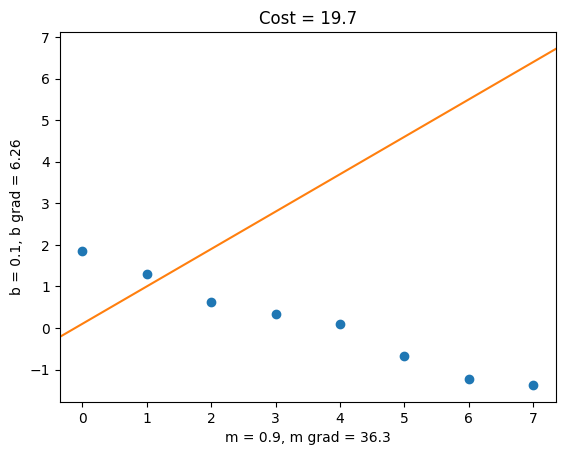

In [ ]:
labeled_regression_plot(xs, ys, m, b, C)

**Step 4**: Gradient descent

In the first round of training, with $\frac{\partial C}{\partial m} = 36.3$ and $\frac{\partial C}{\partial b} = 6.26$, the lowest hanging fruit with respect to reducing cost $C$ is to decrease the slope of the regression line, $m$. The model would also benefit from a comparatively small decrease in the $y$-intercept of the line, $b$.

To control exactly how much we adjust the model parameters $\boldsymbol{\theta}$, we set a **learning rate**, a hyperparameter of ML models that use gradient descent (that is typically denoted with $\alpha$):

In [ ]:
lr = 0.01 # Cover rules of thumb

We use the learning rate $\alpha$ to scale the gradient, i.e., $\alpha \nabla C$:

In [ ]:
scaled_gradient = lr * gradient
scaled_gradient

tensor([[0.0626],
        [0.3630]])

We can now use our scaled gradient to adjust our model parameters $\boldsymbol{\theta}$ in directions that will reduce the model cost $C$.

Since, e.g., $\frac{\partial C}{\partial m} = 36.3$ indicates that increasing the slope parameter $m$ corresponds to an increase in cost $C$, we *subtract* the gradient to adjust each individual parameter in a direction that reduces cost: $$ \boldsymbol{\theta}' = \boldsymbol{\theta} - \alpha \nabla C$$

In [ ]:
new_theta = theta - scaled_gradient
new_theta

tensor([[0.0374],
        [0.5369]])

To see these adjustments even more clearly, you can consider each parameter individually, e.g., $m' = m - \alpha \frac{\partial C}{\partial m}$:

In [ ]:
m - lr*m.grad

tensor([0.5369], grad_fn=<SubBackward0>)

...and $b' = b - \alpha \frac{\partial C}{\partial b}$:

In [ ]:
b - lr*b.grad

tensor([0.0374], grad_fn=<SubBackward0>)

With our updated parameters $\boldsymbol{\theta}$ now in hand, we can use them to check that they do indeed correspond to a decreased cost $C$:

In [ ]:
b = new_theta[0]
m = new_theta[1]

In [ ]:
C = mse(regression(xs, m, b), ys)

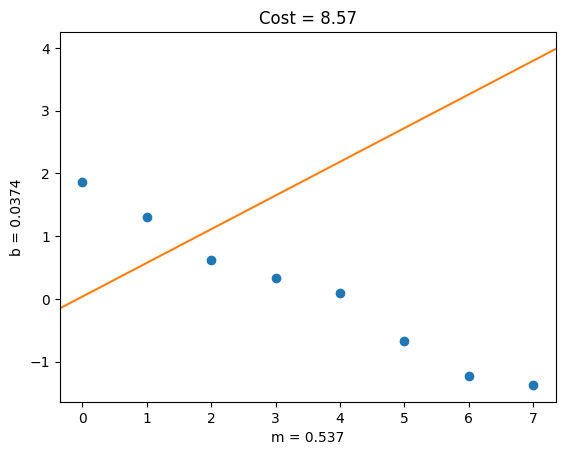

In [ ]:
labeled_regression_plot(xs, ys, m, b, C, include_grad=False) # Gradient of C hasn't been recalculated

### Rinse and Repeat

To perform another round of gradient descent, we let PyTorch know we'd like to track gradients on the tensors `b` and `m` (as we did at the top of the notebook when we created them the first time):

In [ ]:
b.requires_grad_()
_ = m.requires_grad_() # "_ =" is to prevent output within Jupyter; it is cosmetic only

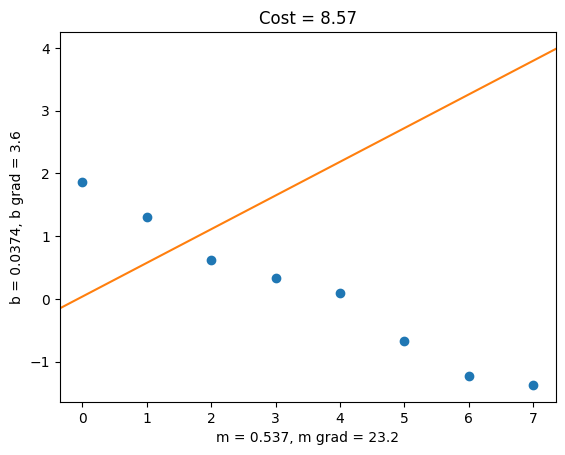

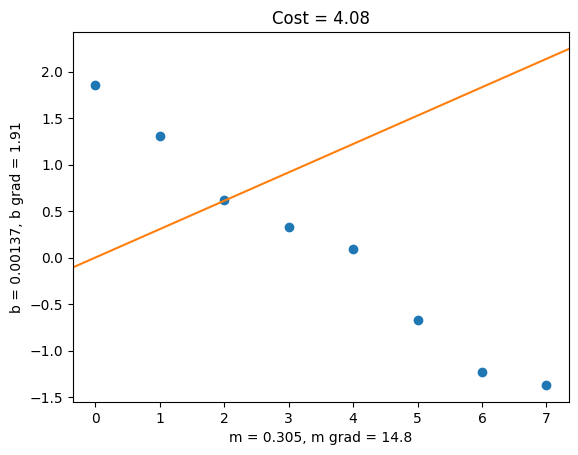

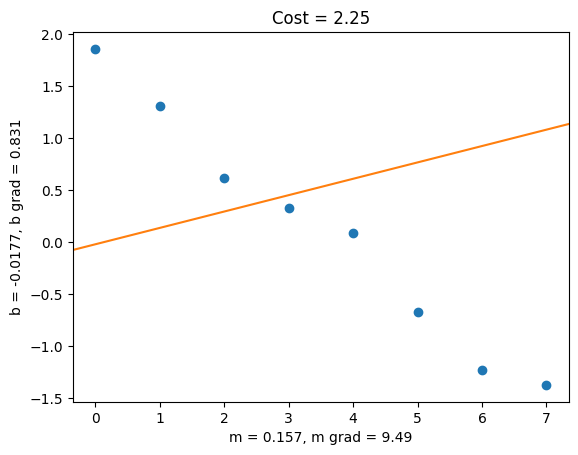

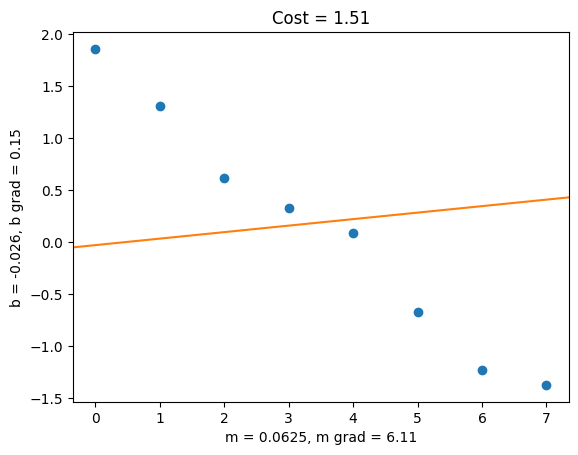

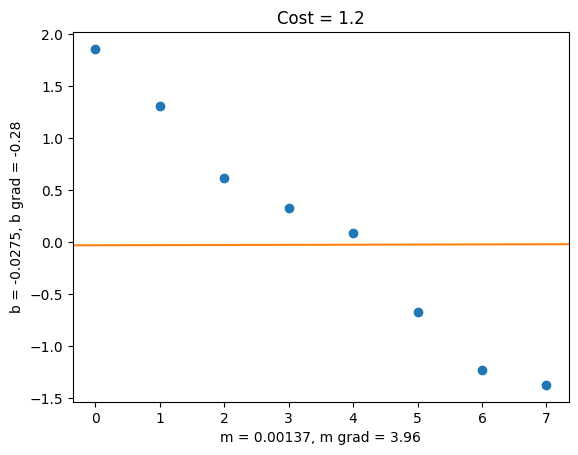

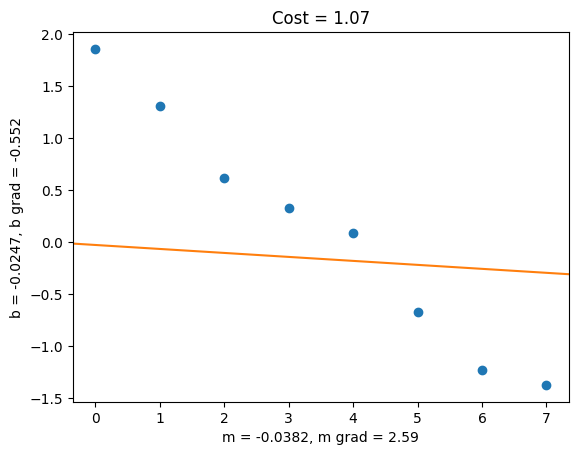

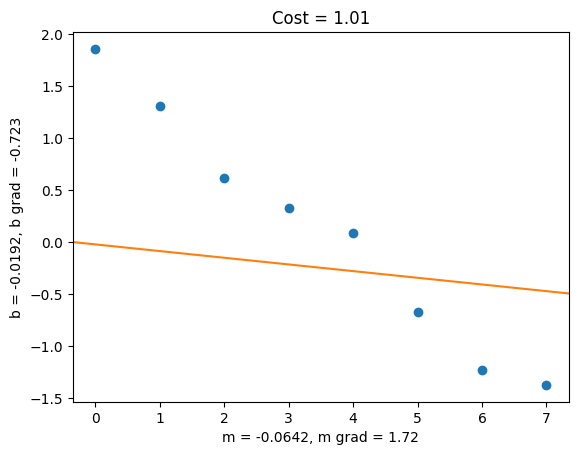

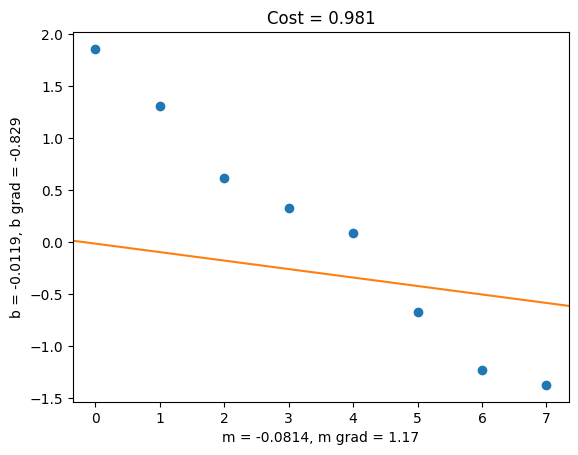

In [ ]:
epochs = 8
for epoch in range(epochs):

    yhats = regression(xs, m, b) # Step 1
    C = mse(yhats, ys) # Step 2

    C.backward() # Step 3

    labeled_regression_plot(xs, ys, m, b, C)

    gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
    theta = torch.tensor([[b, m]]).T

    new_theta = theta - lr*gradient # Step 4

    b = new_theta[0].requires_grad_()
    m = new_theta[1].requires_grad_()

In later rounds of training, after the model's slope $m$ has become closer to the slope represented by the data, $\frac{\partial C}{\partial b}$ becomes negative, indicating an inverse relationship between $b$ and $C$. Meanwhile, $\frac{\partial C}{\partial m}$ remains positive.

This combination directs gradient descent to simultaneously adjust the $y$-intercept $b$ upwards and the slope $m$ downwards in order to reduce cost $C$ and, ultimately, fit the regression line snugly to the data.

Finally, let's run a thousand more epochs (without plots) to converge on optimal parameters $\boldsymbol{\theta}$:

In [ ]:
epochs = 992 # accounts for rounds above to match 1000 epochs of regression-in-pytorch.ipynb
for epoch in range(epochs):

    yhats = regression(xs, m, b) # Step 1
    C = mse(yhats, ys) # Step 2

    C.backward() # Step 3

    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

    gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
    theta = torch.tensor([[b, m]]).T

    new_theta = theta - lr*gradient # Step 4

    b = new_theta[0].requires_grad_()
    m = new_theta[1].requires_grad_()

Epoch 0, cost 0.962, m grad 0.82, b grad -0.894
Epoch 1, cost 0.948, m grad 0.595, b grad -0.934
Epoch 2, cost 0.936, m grad 0.452, b grad -0.957
Epoch 3, cost 0.925, m grad 0.361, b grad -0.969
Epoch 4, cost 0.915, m grad 0.302, b grad -0.975
Epoch 5, cost 0.904, m grad 0.265, b grad -0.977
Epoch 6, cost 0.894, m grad 0.241, b grad -0.976
Epoch 7, cost 0.884, m grad 0.225, b grad -0.973
Epoch 8, cost 0.874, m grad 0.214, b grad -0.969
Epoch 9, cost 0.864, m grad 0.207, b grad -0.965
Epoch 10, cost 0.854, m grad 0.202, b grad -0.96
Epoch 11, cost 0.845, m grad 0.199, b grad -0.955
Epoch 12, cost 0.835, m grad 0.196, b grad -0.95
Epoch 13, cost 0.826, m grad 0.194, b grad -0.945
Epoch 14, cost 0.817, m grad 0.192, b grad -0.939
Epoch 15, cost 0.808, m grad 0.191, b grad -0.934
Epoch 16, cost 0.799, m grad 0.189, b grad -0.929
Epoch 17, cost 0.79, m grad 0.188, b grad -0.923
Epoch 18, cost 0.781, m grad 0.187, b grad -0.918
Epoch 19, cost 0.772, m grad 0.186, b grad -0.913
Epoch 20, cost

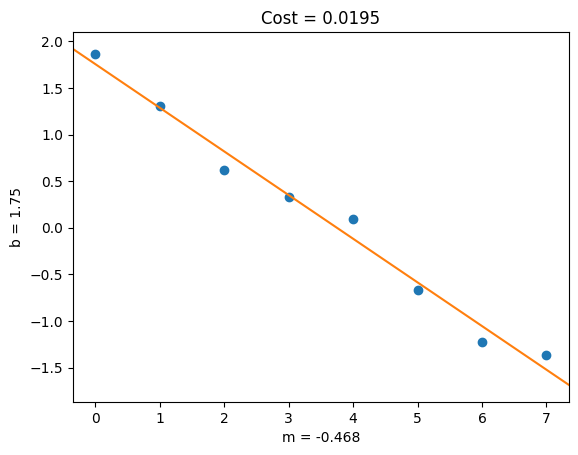

In [ ]:
labeled_regression_plot(xs, ys, m, b, C, include_grad=False)